# **KNN**

Movie Database:
         Movie  Action_Score  Comedy_Score
0  Terminator            98             2
1    Die Hard            95             5
2   Rush Hour            80            85
3  Teddy Bear             5            90
4  Love Story            10            15
5    Notebook             2            10

--- Recommendation System ---
Because you watched 'Terminator'...
We recommend: 'Die Hard'

--- Recommendation System ---
Because you watched 'Teddy Bear'...
We recommend: 'Rush Hour'


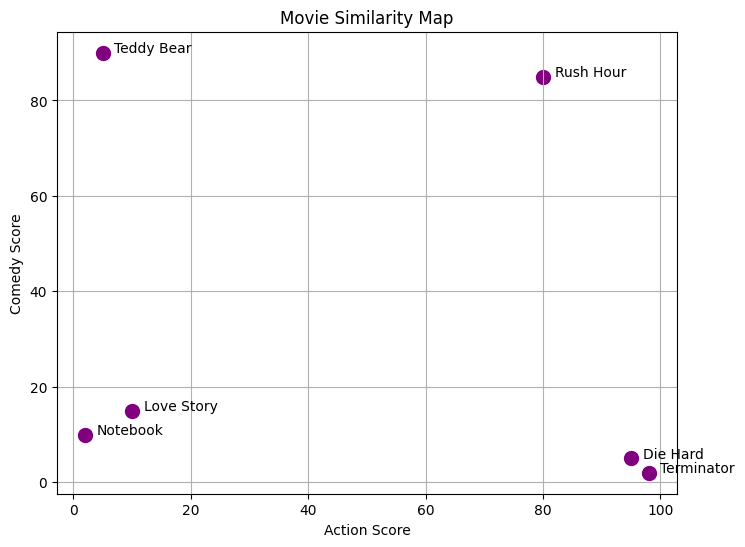

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

data = {
    'Movie': ['Terminator', 'Die Hard', 'Rush Hour', 'Teddy Bear', 'Love Story', 'Notebook'],
    'Action_Score': [98, 95, 80, 5, 10, 2],
    'Comedy_Score': [2, 5, 85, 90, 15, 10]
}

df = pd.DataFrame(data)
print("Movie Database:\n", df)

X = df[['Action_Score', 'Comedy_Score']].values

knn = NearestNeighbors(n_neighbors=2, metric='euclidean')
knn.fit(X)

def recommend_movie(movie_name):

    movie_idx = df[df['Movie'] == movie_name].index[0]

    movie_features = X[movie_idx].reshape(1, -1)

    distances, indices = knn.kneighbors(movie_features)

    recommendation_idx = indices[0][1]
    recommended_movie = df.iloc[recommendation_idx]['Movie']

    print(f"\n--- Recommendation System ---")
    print(f"Because you watched '{movie_name}'...")
    print(f"We recommend: '{recommended_movie}'")

recommend_movie('Terminator')
recommend_movie('Teddy Bear')

plt.figure(figsize=(8, 6))
plt.scatter(df['Action_Score'], df['Comedy_Score'], color='purple', s=100)

for i, txt in enumerate(df['Movie']):
    plt.annotate(txt, (df['Action_Score'][i]+2, df['Comedy_Score'][i]))

plt.title('Movie Similarity Map')
plt.xlabel('Action Score')
plt.ylabel('Comedy Score')
plt.grid(True)
plt.show()

# **LSTM**

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 3
X, y = split_sequence(raw_seq, n_steps)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = Sequential()

model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

print("Training model... (this takes a few seconds)")
model.fit(X, y, epochs=200, verbose=0)

x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
prediction = model.predict(x_input, verbose=0)

print(f"\nTest Sequence: [70, 80, 90]")
print(f"Expected Output: 100")
print(f"LSTM Prediction: {prediction[0][0]:.2f}")

Training model... (this takes a few seconds)

Test Sequence: [70, 80, 90]
Expected Output: 100
LSTM Prediction: 102.36
